<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#Распределение-классов" data-toc-modified-id="Распределение-классов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Распределение классов</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#class_weight" data-toc-modified-id="class_weight-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>class_weight</a></span></li><li><span><a href="#upsampling" data-toc-modified-id="upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>upsampling</a></span></li><li><span><a href="#downsampling" data-toc-modified-id="downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>downsampling</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак
* Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score,f1_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression 
from sklearn.utils import shuffle

### Обзор данных

In [2]:
data  = pd.read_csv('/datasets/Churn.csv')

In [3]:
def explore_data(df):
    display(
        "Сводная информация:", df.info(),
        "10 строк:", df.head(10),
        "Столбцы:", df.columns,
        "Числовое описание:", df.describe(),
        "Сумма пропусков:", df.isna().sum(),
        "Доля пропусков:", df.isna().mean(),
        "Явные дубликаты:", df.duplicated().sum(),
        "Корреляция:", df.corr(),
        sns.heatmap(df.corr())
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


'Сводная информация:'

None

'10 строк:'

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


'Столбцы:'

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

'Числовое описание:'

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


'Сумма пропусков:'

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

'Доля пропусков:'

RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

'Явные дубликаты:'

0

'Корреляция:'

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

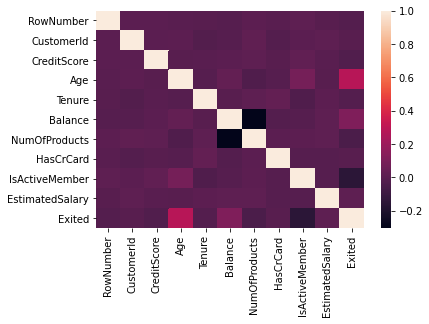

In [4]:
explore_data(data)

* Обнаружены пропуски в столбце **Tenure**
* названия столбцов не в змеином стиле))
* Типы данных корректны
* Сильных взаимосвязей между данными не обнаружено

### Обработка данных

Заменим названия столбцов в стиле🐍

In [5]:
data.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Пропуски в **tenure** заменим на 0, что означает, что клиент использует услуги банка меньше года
Столбцы **'row_number','surname', 'customer_id'** исключим из набора, т.к избыточная информация, которая не улучшит результаты моделей
Закодируем категориальные переменные 'geography', 'gender' и исключим избыточную информацию

In [6]:
data['tenure'] = data['tenure'].fillna(0)
#data['tenure'] = data['tenure'].fillna(0)

In [7]:
data = data.drop(['row_number','surname', 'customer_id'], axis=1)

In [8]:
data = pd.get_dummies(data, columns=['geography', 'gender'], drop_first=True)

In [9]:
data.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Выделим числовые данные для дальнейшей стандартизации

In [10]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

In [11]:
features = data.drop('exited', axis=1)
target = data['exited']

Разделим набор на тренировочную, валидационную и тестовую выборку в соотношении 60:20:20

In [12]:
print("all data: ",data.shape, features.shape, target.shape)
features_train, features_test, target_train,target_test = train_test_split(features,target, stratify=target, test_size=0.2, random_state=12345)
print("first split: ",features_train.shape,target_train.shape,features_test.shape, target_test.shape)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, stratify=target_train, test_size = 0.25, random_state=12345)
print("second split features: ",features_train.shape,features_valid.shape, features_test.shape)
print("second split target: ",target_train.shape,target_valid.shape, target_test.shape)

all data:  (10000, 12) (10000, 11) (10000,)
first split:  (8000, 11) (8000,) (2000, 11) (2000,)
second split features:  (6000, 11) (2000, 11) (2000, 11)
second split target:  (6000,) (2000,) (2000,)


проверим соотношение классов и что это соотношение осталось таким же в выборках.


<AxesSubplot:title={'center':'Распределение классов до разделения набора'}>

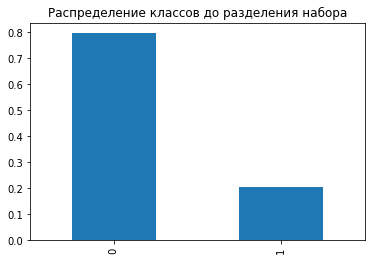

In [41]:
target.value_counts(normalize=True).plot(kind='bar', title='Распределение классов до разделения набора')

<AxesSubplot:title={'center':'Распределение классов после разделения набора'}>

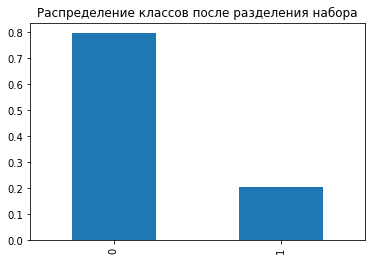

In [42]:
target_train.value_counts(normalize=True).plot(kind='bar', title='Распределение классов после разделения набора')

In [13]:
pd.options.mode.chained_assignment = None

Приведем числовые значения к одинаковуму масштабу

In [14]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [15]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
5536,-0.143332,0.577533,-1.456283,-1.220573,0.797767,1,1,1.029613,0,1,1
8530,1.632702,-0.564119,-0.813711,0.435807,-0.916018,1,0,0.237986,0,0,0
1762,1.116413,-0.468981,-1.134997,1.245822,-0.916018,1,1,-0.686104,0,0,0
9090,1.643028,0.006707,0.150148,-1.220573,-0.916018,1,0,-0.391097,0,0,0
8777,-0.484083,-1.420358,-1.134997,1.421989,0.797767,1,0,-1.361559,0,1,1


## Исследование задачи

In [16]:
f1_result = pd.DataFrame(columns=["log_reg", "rand_forest", "dec_tree"],
                      index=["unbalanced","class_weight","upsampling", "downsampling"])
roc_auc_result = pd.DataFrame(columns=["log_reg", "rand_forest", "dec_tree"],
                      index=["unbalanced","class_weight","upsampling", "downsampling"])

Небольшая заготовка для упрощения жизни - функция для построения ROC кривой и вычисления площади под ней

In [17]:
def plot_roc(model, target, features):
    model_name = str(model).split('(')[0]
    roc_auc = roc_auc_score(target, model.predict(features))
    fpr, tpr, thresholds = roc_curve(target, model.predict_proba(features)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= model_name + '(area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return round(roc_auc,2)

Функция поиска лучших гиперпараметров логистической регрессии

In [18]:
def find_best_log_reg(features_tr,target_tr, features_v, target_v, is_balanced=None):
    best_model = None
    best_result = 0
    for solver_ in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']:
        model = LogisticRegression(random_state=12345, solver=solver_, max_iter=1000,class_weight=is_balanced)
        model.fit(features_tr, target_tr)
        #logit_roc_auc = roc_auc_score(target_train, model.predict(features_train))
        #fpr, tpr, thresholds = roc_curve(target_train, model.predict_proba(features_train)[:,1])

        #result = model.score(features_v, target_v) 
        result = f1_score(target_v, model.predict(features_v))
        if result > best_result:
            best_model = model
            best_result = result

    print(f"F1 наилучшей модели {best_model} на валидационной выборке: {best_result}")
    #print("F1:", f1_score(target_v, best_model.predict(features_v)))
    print(classification_report(target_v, best_model.predict(features_v)))
    return best_model, round(best_result,2)

### LogisticRegression

In [19]:
best_log_reg, f1_result['log_reg']['unbalanced'] = find_best_log_reg(features_train,target_train, features_valid, target_valid  )

F1 наилучшей модели LogisticRegression(max_iter=1000, random_state=12345, solver='liblinear') на валидационной выборке: 0.3214953271028037
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1593
           1       0.67      0.21      0.32       407

    accuracy                           0.82      2000
   macro avg       0.75      0.59      0.61      2000
weighted avg       0.80      0.82      0.78      2000



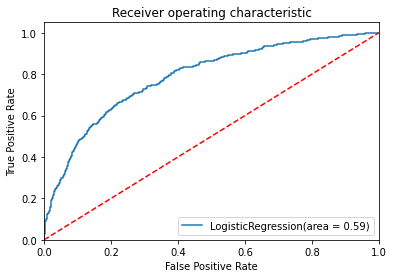

In [20]:
roc_auc_result['log_reg']['unbalanced'] = plot_roc(best_log_reg, target_valid, features_valid)

### RandomForestClassifier

Функция поиска лучших гиперпараметров Random Forest

In [21]:
def find_best_random_forest(features_tr,target_tr, features_v, target_v,is_balanced=None):
    best_model = None
    best_result = 0
    for est in range(1, 30):
        for depth in range(1, 30):
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth,class_weight=is_balanced) 
            model.fit(features_tr, target_tr) 
            #result = model.score(features_v, target_v) 
            result = f1_score(target_v, model.predict(features_v)) 
            if result > best_result:
                best_model = model
                best_result = result

    print(f"F1 наилучшей модели {best_model} на валидационной выборке: {best_result}")
    #print("F1 наилучшей модели {best_model} на валидационной выборке: {best_result}:")#, f1_score(target_v, best_model.predict(features_v)
    print(classification_report(target_v, best_model.predict(features_v)))
    return best_model, round(best_result,2)

In [22]:
best_random_forest, f1_result['rand_forest']['unbalanced'] = find_best_random_forest(features_train,target_train, features_valid, target_valid )

F1 наилучшей модели RandomForestClassifier(max_depth=23, n_estimators=19, random_state=12345) на валидационной выборке: 0.5782414307004471
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1593
           1       0.73      0.48      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



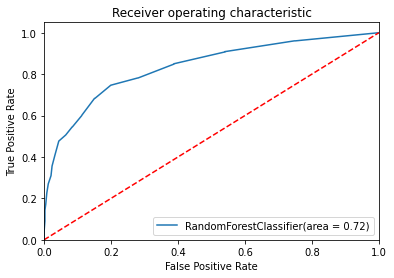

In [23]:
roc_auc_result['rand_forest']['unbalanced'] = plot_roc(best_random_forest, target_valid, features_valid)

### DecisionTreeClassifier

Функция поиска лучших гиперпараметров DecisionTreeClassifier

In [24]:
def find_best_dec_tree(features_tr,target_tr, features_v, target_v, is_balanced=None):
    best_model = None
    best_result = 0
    for depth in range(1, 30):
        model = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight=is_balanced)
        model.fit(features_tr, target_tr)
        #result = model.score(features_v, target_v) 
        result = f1_score(target_v, model.predict(features_v))
        if result > best_result:
            best_model = model
            best_result = result

    print(f"F1 наилучшей модели {best_model} на валидационной выборке: {best_result}")
    #print("F1 на валидационной выборке:", f1_score(target_v, best_model.predict(features_v)))
    print("Метрики на валидационной выборке",classification_report(target_v, best_model.predict(features_v)))
    return best_model, round(best_result,2)

In [25]:
best_dec_tree, f1_result['dec_tree']['unbalanced'] = find_best_dec_tree(features_train,target_train, features_valid, target_valid)

F1 наилучшей модели DecisionTreeClassifier(max_depth=8, random_state=12345) на валидационной выборке: 0.5817655571635311
Метрики на валидационной выборке               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.71      0.49      0.58       407

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.84      0.86      0.85      2000



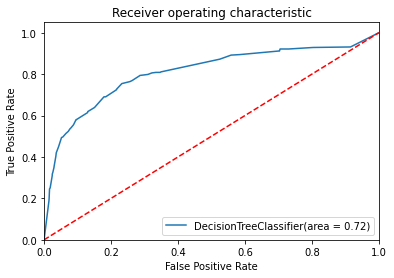

In [26]:
roc_auc_result['dec_tree']['unbalanced'] = plot_roc(best_dec_tree, target_valid, features_valid)

### Распределение классов 

Посмотрим распределение классов на тренировочной выборке

<AxesSubplot:title={'center':'Распределение классов'}>

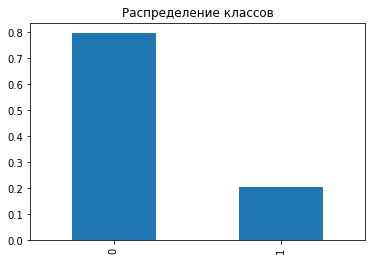

In [27]:
target_train.value_counts(normalize=True).plot(kind='bar', title='Распределение классов')

Очевидно преобладает один класс объектов. Создадим простую модель, которая всегда будет предсказывать только 0

In [28]:
target_pred_constant = pd.Series([0]*len(target_valid))
#print(accuracy_score(target_valid, target_pred_constant).round(3)) 
#print("F1:", f1_score(target_valid, target_pred_constant))
print(classification_report(target_valid, target_pred_constant))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


80% доля правильных ответов 👏👏👏 Заканчиваем исследование, забираем кэш💰💰

## Борьба с дисбалансом

### class_weight

Попробуем увеличить вес болоее редкого класса

In [29]:
cw_best_log_reg, f1_result['log_reg']['class_weight'] = find_best_log_reg(features_train,target_train, features_valid, target_valid, is_balanced='balanced')

F1 наилучшей модели LogisticRegression(class_weight='balanced', max_iter=1000, random_state=12345,
                   solver='liblinear') на валидационной выборке: 0.5099739809193409
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1593
           1       0.39      0.72      0.51       407

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.80      0.72      0.74      2000



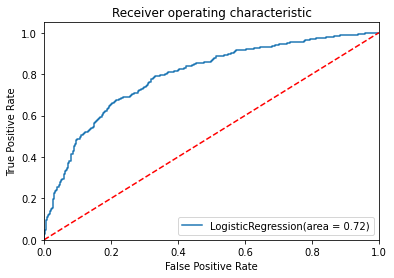

In [30]:
roc_auc_result['log_reg']['class_weight'] = plot_roc(cw_best_log_reg, target_valid, features_valid)

In [31]:
cw_best_random_forest, f1_result['rand_forest']['class_weight'] = find_best_random_forest(features_train,target_train, features_valid, target_valid, is_balanced='balanced' )

F1 наилучшей модели RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=26,
                       random_state=12345) на валидационной выборке: 0.6353711790393013
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1593
           1       0.57      0.71      0.64       407

    accuracy                           0.83      2000
   macro avg       0.75      0.79      0.76      2000
weighted avg       0.85      0.83      0.84      2000



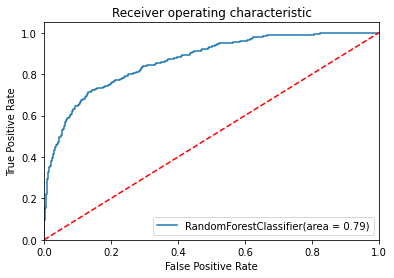

In [32]:
roc_auc_result['rand_forest']['class_weight'] = plot_roc(cw_best_random_forest, target_valid, features_valid)

In [33]:
cw_best_dec_tree,f1_result['dec_tree']['class_weight'] = find_best_dec_tree(features_train,target_train, features_valid, target_valid, is_balanced='balanced')

F1 наилучшей модели DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=12345) на валидационной выборке: 0.5734639358860195
Метрики на валидационной выборке               precision    recall  f1-score   support

           0       0.93      0.75      0.83      1593
           1       0.45      0.79      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.76      0.78      2000



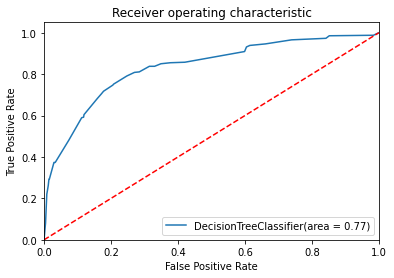

In [34]:
roc_auc_result['dec_tree']['class_weight'] = plot_roc(cw_best_dec_tree, target_valid, features_valid)

### upsampling

Увеличим количество представителей более редкого класса

In [35]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)


Проверим показатели моделей после того, как сравняли доли классов в выборке

<AxesSubplot:title={'center':'Распределение классов'}>

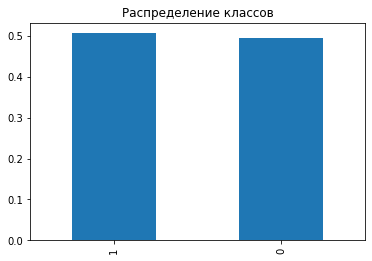

In [37]:
target_upsampled.value_counts(normalize=True).plot(kind='bar', title='Распределение классов')

In [38]:
print("features shape: ",features_upsampled.shape,"\ntarget shape: ", target_upsampled.shape)

features shape:  (9669, 11) 
target shape:  (9669,)


In [356]:
us_best_log_reg, f1_result['log_reg']['upsampling'] = find_best_log_reg(features_upsampled, target_upsampled, features_valid, target_valid)

F1 наилучшей модели LogisticRegression(max_iter=1000, random_state=12345, solver='liblinear') на валидационной выборке: 0.5068493150684932
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.73      0.51       407

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.71      0.74      2000



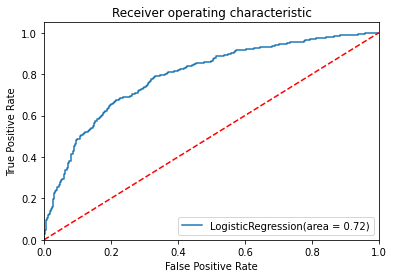

In [357]:
roc_auc_result['log_reg']['upsampling'] = plot_roc(us_best_log_reg, target_valid, features_valid)

In [358]:
us_best_random_forest, f1_result['rand_forest']['upsampling'] = find_best_random_forest(features_upsampled, target_upsampled, features_valid, target_valid)

F1 наилучшей модели RandomForestClassifier(max_depth=12, n_estimators=17, random_state=12345) на валидационной выборке: 0.6325802615933412
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.61      0.65      0.63       407

    accuracy                           0.85      2000
   macro avg       0.76      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



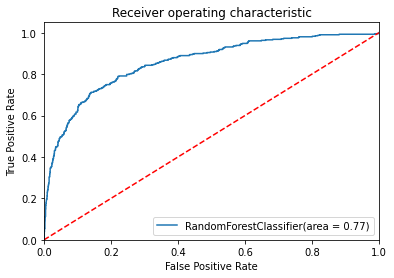

In [359]:
roc_auc_result['rand_forest']['upsampling'] = plot_roc(us_best_random_forest, target_valid, features_valid)

In [360]:
us_best_dec_tree, f1_result['dec_tree']['upsampling'] = find_best_dec_tree(features_upsampled, target_upsampled, features_valid, target_valid)

F1 наилучшей модели DecisionTreeClassifier(max_depth=6, random_state=12345) на валидационной выборке: 0.5752688172043011
Метрики на валидационной выборке               precision    recall  f1-score   support

           0       0.93      0.76      0.84      1593
           1       0.45      0.79      0.58       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.76      0.78      2000



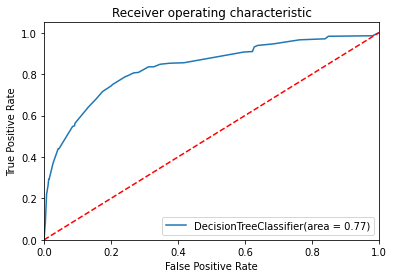

In [361]:
roc_auc_result['dec_tree']['upsampling'] = plot_roc(us_best_dec_tree, target_valid, features_valid)

### downsampling

In [362]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

Сократив долю нулевого класса получим следущее распределение

<AxesSubplot:title={'center':'Распределение классов'}>

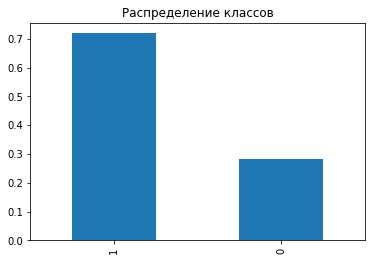

In [363]:
target_downsampled.value_counts(normalize=True).plot(kind='bar', title='Распределение классов')

In [364]:
ds_best_log_reg, f1_result['log_reg']['downsampling'] = find_best_log_reg(features_upsampled, target_upsampled, features_valid, target_valid)

F1 наилучшей модели LogisticRegression(max_iter=1000, random_state=12345, solver='liblinear') на валидационной выборке: 0.5068493150684932
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.73      0.51       407

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.71      0.74      2000



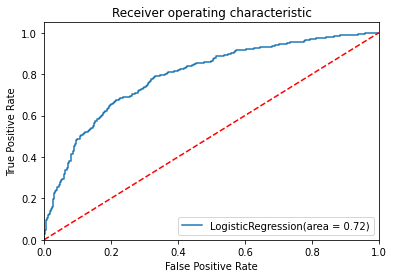

In [365]:
roc_auc_result['log_reg']['downsampling'] = plot_roc(ds_best_log_reg, target_valid, features_valid)

In [366]:
ds_best_random_forest, f1_result['rand_forest']['downsampling'] = find_best_random_forest(features_upsampled, target_upsampled, features_valid, target_valid)

F1 наилучшей модели RandomForestClassifier(max_depth=12, n_estimators=17, random_state=12345) на валидационной выборке: 0.6325802615933412
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.61      0.65      0.63       407

    accuracy                           0.85      2000
   macro avg       0.76      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



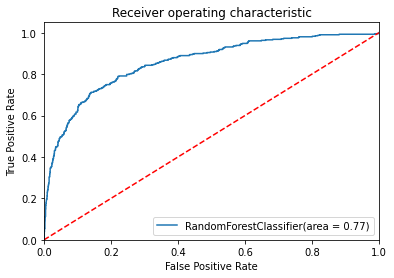

In [367]:
roc_auc_result['rand_forest']['downsampling'] = plot_roc(ds_best_random_forest, target_valid, features_valid)

In [368]:
ds_best_dec_tree,f1_result['dec_tree']['downsampling'] = find_best_dec_tree(features_upsampled, target_upsampled, features_valid, target_valid)

F1 наилучшей модели DecisionTreeClassifier(max_depth=6, random_state=12345) на валидационной выборке: 0.5752688172043011
Метрики на валидационной выборке               precision    recall  f1-score   support

           0       0.93      0.76      0.84      1593
           1       0.45      0.79      0.58       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.76      0.78      2000



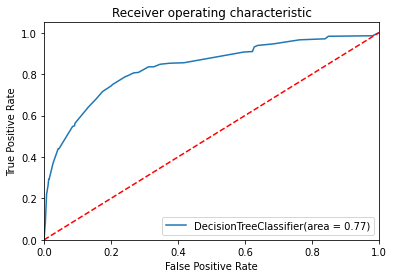

In [369]:
roc_auc_result['dec_tree']['downsampling'] = plot_roc(ds_best_dec_tree, target_valid, features_valid)

### Вывод

По итогам исследования выявлена лучшая модель по метрикам f1 и auc roc.

In [380]:
cw_best_random_forest

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=26,
                       random_state=12345)

<AxesSubplot:title={'center':'f1 score'}>

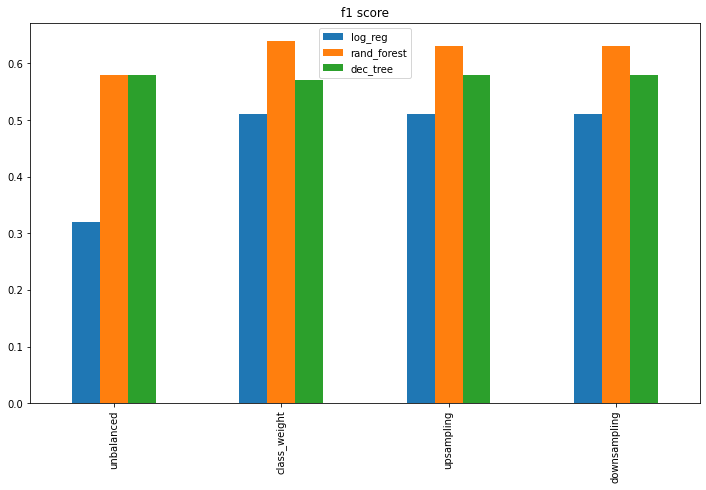

In [370]:
f1_result.plot(kind='bar', title='f1 score', figsize=(12,7))

In [373]:
f1_result

,log_reg,rand_forest,dec_tree
unbalanced,0.32,0.58,0.58
class_weight,0.51,0.64,0.57
upsampling,0.51,0.63,0.58
downsampling,0.51,0.63,0.58


<AxesSubplot:title={'center':'ROC AUC area'}>

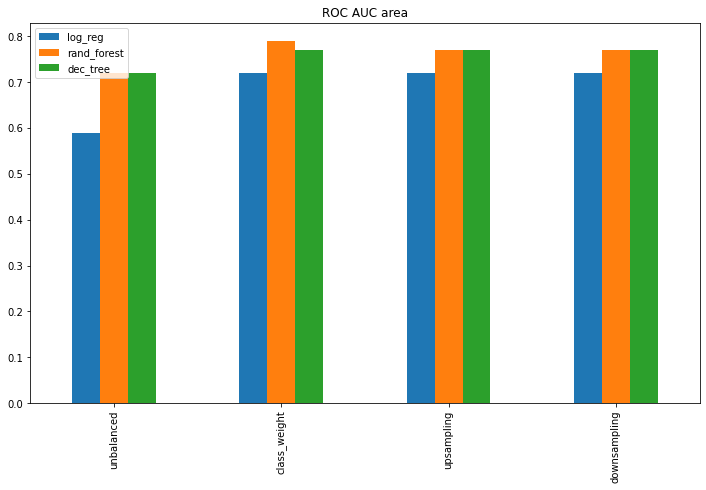

In [371]:
roc_auc_result.plot(kind='bar', title='ROC AUC area', figsize=(12,7))

In [372]:
roc_auc_result

,log_reg,rand_forest,dec_tree
unbalanced,0.59,0.72,0.72
class_weight,0.72,0.79,0.77
upsampling,0.72,0.77,0.77
downsampling,0.72,0.77,0.77


## Тестирование модели

In [377]:
predictions = cw_best_random_forest.predict(features_test)
print(classification_report(target_test, predictions))


              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1593
           1       0.57      0.71      0.63       407

    accuracy                           0.83      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.85      0.83      0.84      2000



### Вывод

    По итогам исследования выявлена лучшая модель для классификации - Random Forest с максимальной глубиной 8 и 26 деревьями, увеличение весов более редкого класса способствовало дополнительному повышению метрики f1 - удалось достигнуть значения 0.63 на тестовой выборке. Однако auc roc  на тестовой выборке всего лишь 0.79, что значительно ниже идеального значения - 1. 

Результаты предсказания на тестовой выборке можно увидеть ниже, на матрице ошибок. 
    
    Доля правильных ответов на тестовой выборке достигла значения 0.83 (результат простой модели 0.8😅), точность распознавания положительного класса значительно ниже точности распознавания нулевого класса

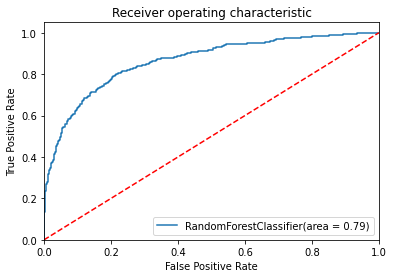

0.79

In [378]:
plot_roc(cw_best_random_forest, target_test, features_test)

Text(0.5, 1.0, 'Матрица ошибок')

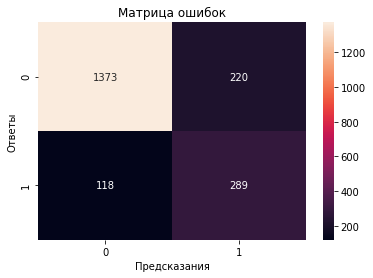

In [379]:
sns.heatmap(confusion_matrix(target_test, predictions), annot=True, fmt='d')
plt.xlabel("Предсказания")
plt.ylabel("Ответы")
plt.title("Матрица ошибок")